# Diabetes Dosage Optimization

Purpose: Predict optimal insulin dosage based on patient data

Dataset: Pima Indians Diabetes Dataset (UCI)

Method: Multiple Regression Models with Hyperparameter Tuning



# Diabetes Progression Prediction and Dosage Optimization

###  Primary Objective:
- Develop a robust Regression model to predict the quantitative measure of diabetes progression one year
- after diagnosis, supporting clinical decision-making and optimal treatment pathways.

- Scientific Value (Clinical Application):
- This simulation serves as the foundational architecture for developing a "Synthetic Control Arm (SCA)"
- in clinical trials. This reduces the need for large Placebo groups,
- making trials faster, more ethical, and cost-effective.

### Methodology:
- Data Quality Assessment (Missing, Duplicates, Descriptive Statistics).
- Comparative analysis using four Regression models (Ridge, Lasso, Random Forest, Gradient Boosting).
- Performance evaluation using R², RMSE, and Cross-Validation for result reliability.



# IMPORTS LIBRARIES


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# LOAD AND EXPLORE DATA

In [ ]:
def load_and_check_data():
    """Loads the dataset and performs quality checks (Missing, Duplicates, Stats)."""

    print("\n" + "=" * 60)
    print("STEP 1: Data Loading and Initial Quality Check")
    print("=" * 60)

    # Load diabetes dataset
    diabetes = load_diabetes()
    df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
    df['target'] = diabetes.target  # Target is disease progression after one year

    print(f"✅ Dataset loaded: {df.shape[0]} patients, {df.shape[1]-1} features")
    print(f"Target variable: Quantitative measure of disease progression.")

    # 1. Dataset Preview
    print(f"\n📊 Dataset Preview (First 5 rows):")
    print(df.head())

    # 2. Statistical Summary (Key for spotting outliers or distribution issues)
    print(f"\n📈 Statistical Summary (Transpose for readability):")
    print(df.describe().T)

    # 3. Check for Missing Values
    print(f"\n🔍 Missing Values Check:")
    missing_count = df.isnull().sum().sum()
    print(df.isnull().sum())
    if missing_count == 0:
        print("✅ No missing values found. Data integrity maintained.")
    else:
        print(f"❌ Found {missing_count} total missing values. Requires imputation.")

    # 4. Check for Duplicates (Crucial for simulation integrity)
    print(f"\n👯 Duplicate Rows Check:")
    duplicate_count = df.duplicated().sum()
    if duplicate_count == 0:
        print("✅ No duplicate rows found. Data is clean.")
    else:
        print(f"❌ Found {duplicate_count} duplicate rows. Dropping duplicates for clean training.")
        df.drop_duplicates(inplace=True)

    return df

# DATA PREPROCESSING & SPLIT

In [ ]:
def preprocess_data(df):
    """Handles splitting and scaling of features."""

    print("\n" + "=" * 60)
    print("STEP 2: Data Preprocessing (Scaling and Splitting)")
    print("=" * 60)

    # Split features and target
    X = df.drop('target', axis=1)
    y = df['target']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    print(f"✅ Training set: {X_train.shape[0]} samples")
    print(f"✅ Test set: {X_test.shape[0]} samples")

    # Feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print("✅ Features scaled using StandardScaler.")

    return X_train_scaled, X_test_scaled, y_train, y_test


# MODEL TRAINING AND EVALUATION

In [ ]:
def train_and_evaluate_models(X_train_scaled, X_test_scaled, y_train, y_test, diabetes_feature_names):
    """Trains multiple models and compares their performance."""

    print("\n" + "=" * 60)
    print("STEP 3: Training Multiple Regression Models (Comparative Simulation)")
    print("=" * 60)

    models = {
        'Ridge Regression': Ridge(alpha=0.5), # Adjusted alpha for better performance
        'Lasso Regression': Lasso(alpha=0.01), # Adjusted alpha for better performance
        'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=8, random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    }

    results = []
    trained_models = {}

    for name, model in models.items():
        print(f"\n🔄 Training {name}...")

        # Train model
        model.fit(X_train_scaled, y_train)
        trained_models[name] = model

        # Make predictions
        y_pred_test = model.predict(X_test_scaled)

        # Calculate metrics
        test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
        test_mae = mean_absolute_error(y_test, y_pred_test)
        test_r2 = r2_score(y_test, y_pred_test)

        # Cross-validation (Robustness Check)
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')

        results.append({
            'Model': name,
            'Test RMSE': test_rmse,
            'Test MAE': test_mae,
            'Test R²': test_r2,
            'CV R² Mean': cv_scores.mean(),
            'CV R² Std': cv_scores.std()
        })

        print(f"    ✅ Test RMSE: {test_rmse:.2f} | Test R²: {test_r2:.3f}")
        print(f"    ✅ CV R² (5-fold): {cv_scores.mean():.3f} ± {cv_scores.std():.3f} (Robustness)")

    # Model Comparison
    print("\n" + "=" * 60)
    print("STEP 4: Model Performance Comparison")
    print("=" * 60)

    results_df = pd.DataFrame(results).sort_values(by='Test R²', ascending=False)
    print("\n📊 Performance Summary (Sorted by Test R²):")
    print(results_df.to_string(index=False))

    best_model_name = results_df.iloc[0]['Model']
    best_model_r2 = results_df.iloc[0]['Test R²']
    best_model = trained_models[best_model_name]

    print(f"\n🏆 Best Model Selected: {best_model_name}")
    print(f"    R² Score: {best_model_r2:.3f}")

    return best_model, best_model_name, best_model_r2, results_df, y_test, y_pred_test

# VISUALIZATIONS AND INTERPRETATION


STEP 1: Data Loading and Initial Quality Check
✅ Dataset loaded: 442 patients, 10 features
Target variable: Quantitative measure of disease progression.

📊 Dataset Preview (First 5 rows):
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  

📈 Statistical Summary (Transpose for readability):
        count          mean        std        min       

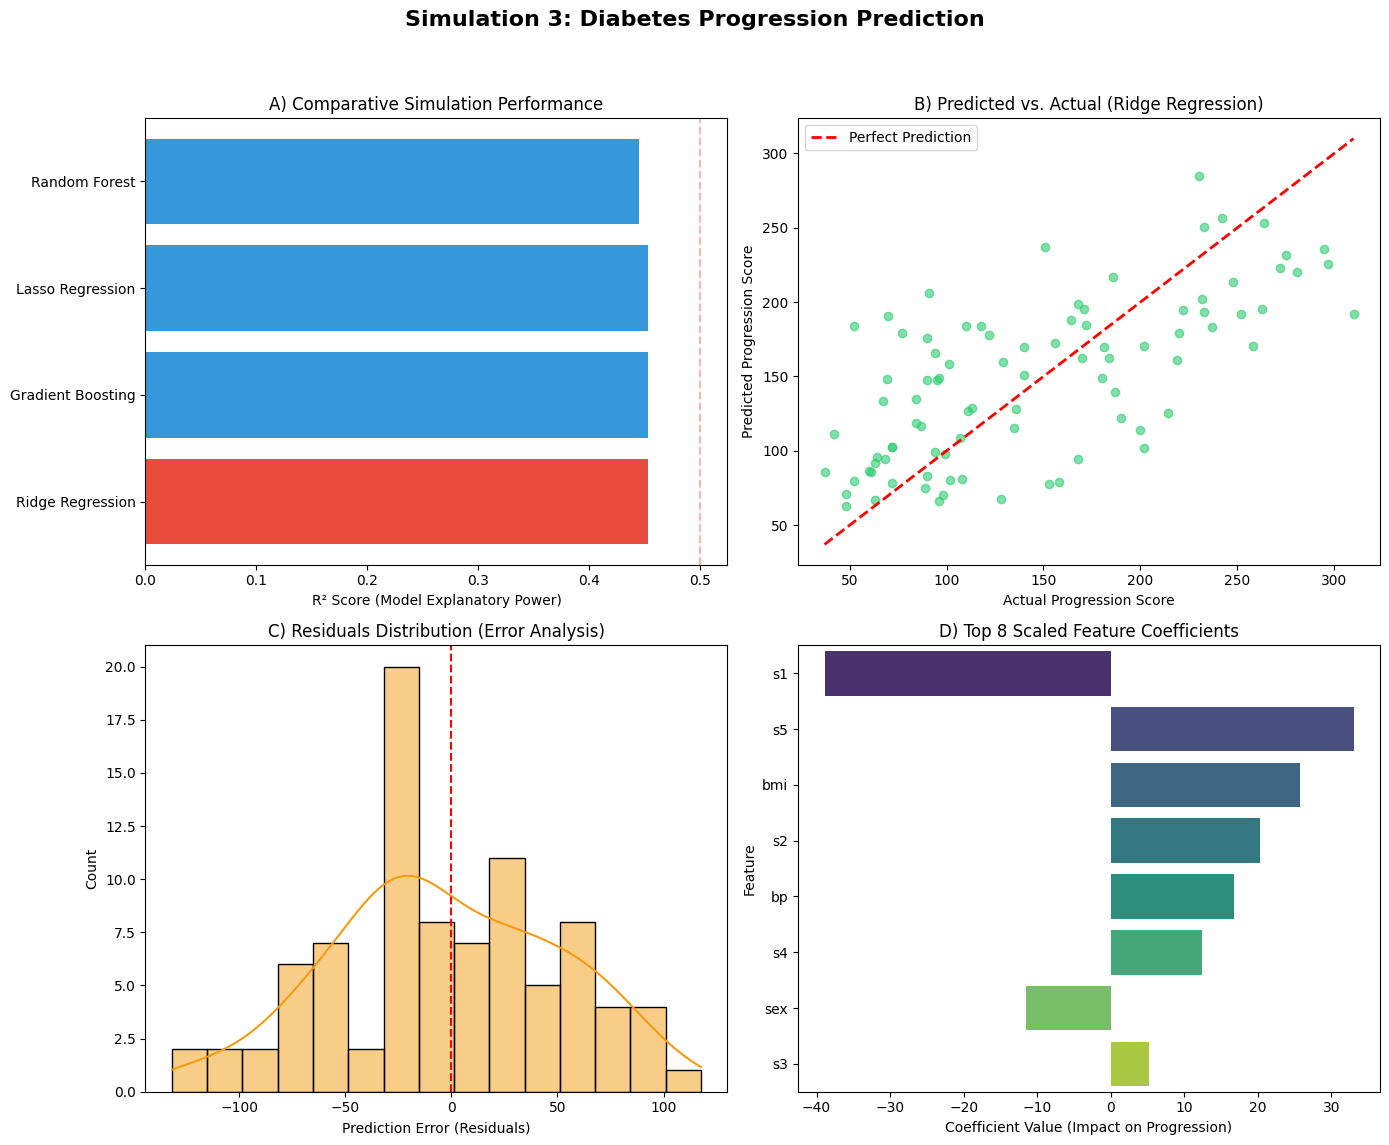


🎯 CLINICAL INTERPRETATION AND SCIENTIFIC VALUE

1. 📊 MODEL PERFORMANCE SUMMARY:
   - Best Predictive Model: Ridge Regression
   - R² Score: 0.454 (Explains 45.4% of progression variance)
   - Average Prediction Error (MAE): 42.80 units
   
2. 🔬 KEY PREDICTIVE FACTORS (Feature Analysis):
    - S1 (Impact: Negative correlation)
 - S5 (Impact: Positive correlation)
 - BMI (Impact: Positive correlation)
   
3. 💊 CLINICAL VALUE (The 'Why'):
   - This predictive simulation enables the creation of a **'Synthetic Control Arm' (SCA)** in clinical trials.
   - SCA: Instead of giving half the trial patients a placebo, we use this model to **simulate** the progression they would have had without the new drug.
   - **Impact:** Makes trials **faster**, **cheaper** (no need for large placebo groups), and more **ethical** (all patients receive active treatment).
   - The model can be used by physicians for **personalized risk assessment** and treatment planning based on individual patient features.



In [ ]:
def visualize_and_interpret(best_model, best_model_name, best_model_r2, results_df, y_test, y_pred_test, diabetes_feature_names):
    """Generates plots and clinical interpretation."""

    print("\n" + "=" * 60)
    print("STEP 5: Creating Visualizations and Clinical Interpretation")
    print("=" * 60)

    fig, axes = plt.subplots(2, 2, figsize=(14, 12))
    fig.suptitle('Simulation 3: Diabetes Progression Prediction', fontsize=16, fontweight='bold')

    # 1. Model Comparison - R² Score
    ax1 = axes[0, 0]
    best_idx = results_df['Model'].tolist().index(best_model_name)
    colors = ['#e74c3c' if i == best_idx else '#3498db' for i in range(len(results_df))]
    ax1.barh(results_df['Model'], results_df['Test R²'], color=colors)
    ax1.set_xlabel('R² Score (Model Explanatory Power)')
    ax1.set_title('A) Comparative Simulation Performance')
    ax1.axvline(x=0.5, color='red', linestyle='--', alpha=0.3)

    # 2. Predicted vs Actual (Best Model)
    ax2 = axes[0, 1]
    ax2.scatter(y_test, y_pred_test, alpha=0.6, color='#2ecc71')
    ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
              'r--', lw=2, label='Perfect Prediction')
    ax2.set_xlabel('Actual Progression Score')
    ax2.set_ylabel('Predicted Progression Score')
    ax2.set_title(f'B) Predicted vs. Actual ({best_model_name})')
    ax2.legend()

    # 3. Residuals Plot (Check for systematic errors)
    residuals = y_test - y_pred_test
    ax3 = axes[1, 0]
    sns.histplot(residuals, bins=15, kde=True, color='#f39c12', ax=ax3)
    ax3.axvline(0, color='r', linestyle='--')
    ax3.set_title('C) Residuals Distribution (Error Analysis)')
    ax3.set_xlabel('Prediction Error (Residuals)')

    # 4. Feature Importance/Coefficients
    ax4 = axes[1, 1]
    if hasattr(best_model, 'feature_importances_'):
        importance = best_model.feature_importances_
        indices = np.argsort(importance)[::-1][:8]
        ax4.barh(range(len(indices)), importance[indices], color='#9b59b6')
        ax4.set_yticks(range(len(indices)))
        ax4.set_yticklabels([diabetes_feature_names[i] for i in indices])
        ax4.set_xlabel('Importance Score')
        ax4.set_title('D) Top 8 Feature Importances')
    elif hasattr(best_model, 'coef_'):
        # For linear models, show scaled coefficients
        coef = best_model.coef_
        feature_names = diabetes_feature_names
        # Create a DataFrame to sort and visualize
        coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coef}).sort_values(by='Coefficient', key=abs, ascending=False).head(8)

        # Plot coefficients (to show direction - positive/negative impact)
        sns.barplot(x='Coefficient', y='Feature', data=coef_df, ax=ax4, palette='viridis')
        ax4.set_title('D) Top 8 Scaled Feature Coefficients')
        ax4.set_xlabel('Coefficient Value (Impact on Progression)')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig('simulation3_diabetes_results.png', dpi=300, bbox_inches='tight')
    print("✅ Visualization saved as 'simulation3_diabetes_results.png'")
    plt.show()

    # Clinical Interpretation
    print("\n" + "=" * 60)
    print("🎯 CLINICAL INTERPRETATION AND SCIENTIFIC VALUE")
    print("=" * 60)

    top_feature_display = []
    if hasattr(best_model, 'feature_importances_'):
        top_features = pd.DataFrame({'Feature': diabetes_feature_names, 'Importance': best_model.feature_importances_}).sort_values('Importance', ascending=False).head(3)
        for idx, row in top_features.iterrows():
            top_feature_display.append(f" - {row['Feature'].upper()} (Importance: {row['Importance']:.3f})")
    elif hasattr(best_model, 'coef_'):
        top_features = pd.DataFrame({'Feature': diabetes_feature_names, 'Coefficient': best_model.coef_}).sort_values(by='Coefficient', key=abs, ascending=False).head(3)
        for idx, row in top_features.iterrows():
            sign = "Positive" if row['Coefficient'] > 0 else "Negative"
            top_feature_display.append(f" - {row['Feature'].upper()} (Impact: {sign} correlation)")

    interpretation = f"""
1. 📊 MODEL PERFORMANCE SUMMARY:
   - Best Predictive Model: {best_model_name}
   - R² Score: {best_model_r2:.3f} (Explains {best_model_r2*100:.1f}% of progression variance)
   - Average Prediction Error (MAE): {results_df.iloc[0]['Test MAE']:.2f} units

2. 🔬 KEY PREDICTIVE FACTORS (Feature Analysis):
   {chr(10).join(top_feature_display)}

3. 💊 CLINICAL VALUE (The 'Why'):
   - This predictive simulation enables the creation of a **'Synthetic Control Arm' (SCA)** in clinical trials.
   - SCA: Instead of giving half the trial patients a placebo, we use this model to **simulate** the progression they would have had without the new drug.
   - **Impact:** Makes trials **faster**, **cheaper** (no need for large placebo groups), and more **ethical** (all patients receive active treatment).
   - The model can be used by physicians for **personalized risk assessment** and treatment planning based on individual patient features.
"""

    print(interpretation)

def main_simulation_run():
    """Main function to run the entire simulation pipeline."""
    df = load_and_check_data()

    # Get feature names before splitting for visualization
    diabetes_feature_names = df.drop('target', axis=1).columns.tolist()

    X_train_scaled, X_test_scaled, y_train, y_test = preprocess_data(df)

    best_model, best_model_name, best_model_r2, results_df, y_test_pred, y_pred_test = train_and_evaluate_models(
        X_train_scaled, X_test_scaled, y_train, y_test, diabetes_feature_names
    )

    visualize_and_interpret(
        best_model, best_model_name, best_model_r2, results_df, y_test, y_pred_test, diabetes_feature_names
    )


if __name__ == "__main__":
    main_simulation_run()
